In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

# Heart Attack Analysis and Prediction

EDA

Missing Value Analysis

Categoric and Numeric Features

Standardization

Box - Swarm - Cat - Correlation Plot Analysis

Outlier Detection

Modelling and Tuning Machine Learning Model

A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood.
The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.
Coronary artery disease (CAD) is the main cause of heart attack.

# Data Content

Age: Age of the patient
    
Sex: Sex of the patient
    
exang: exercise induced angina (1 = yes; 0 = no)
    
ca: number of major vessels (0-3)
    
cp: Chest Pain type chest pain type   
    
Value 1: typical angina
    
Value 2: atypical angina
    
Value 3: non-anginal pain
    
Value 4: asymptomatic
    
trtbps: resting blood pressure (in mm Hg)
    
chol: cholestoral in mg/dl fetched via BMI sensor
    
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    
rest_ecg: resting electrocardiographic results
    
Value 0: normal
    
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
thalach: maximum heart rate achieved
    
target: 0= less chance of heart attack 1= more chance of heart attack

# Read and Analysis Data

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe() # describe basic statistics of data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Missing Value Analysis

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Unique Value Analysis

In [6]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


# Categorical Feature Analysis

In [8]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]

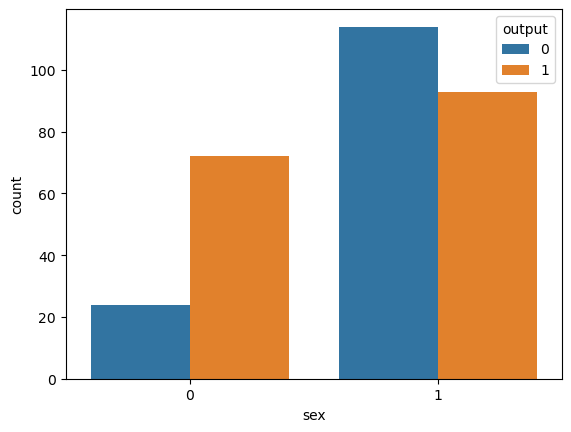

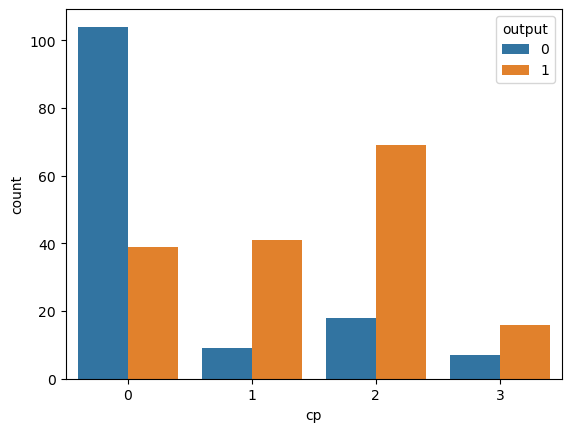

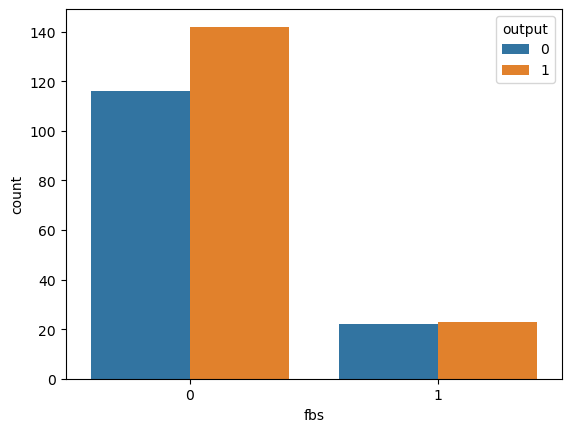

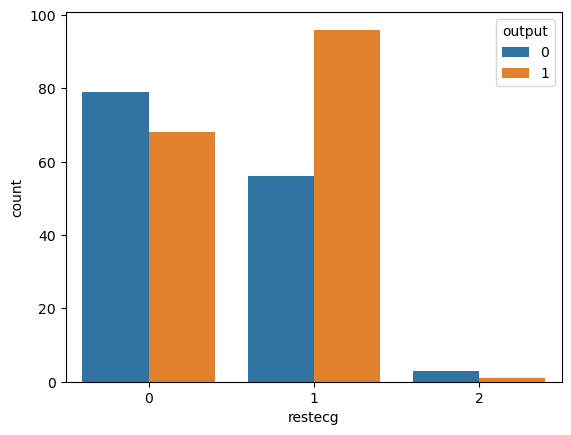

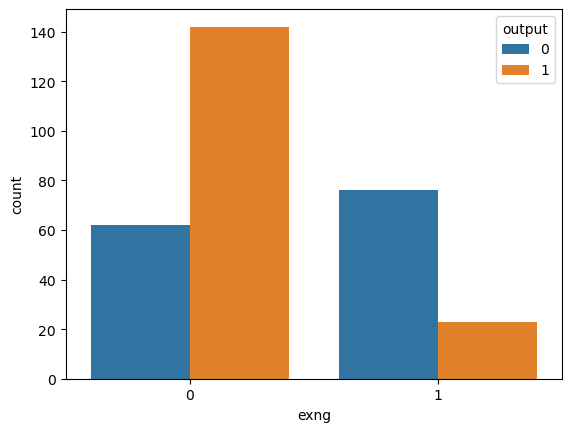

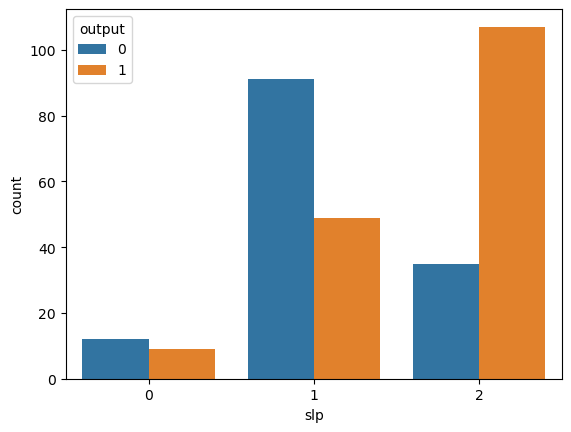

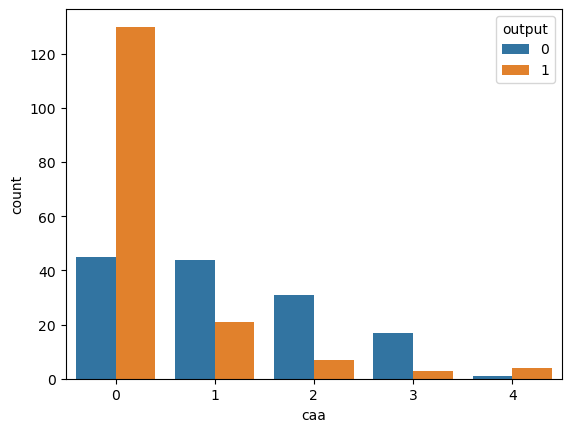

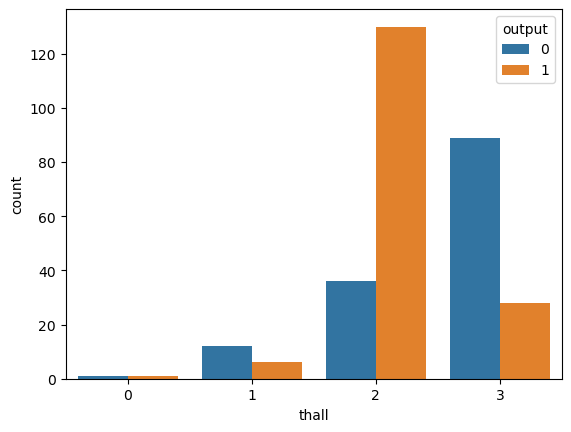

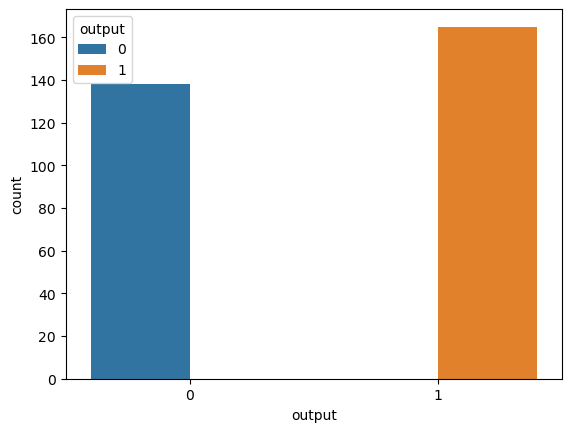

In [9]:
df_categoric=df.loc[:,categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x=i,data=df_categoric,hue="output")

# Numeric Feature Analysis

Bivariate data analysis with scatter plot

In [10]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

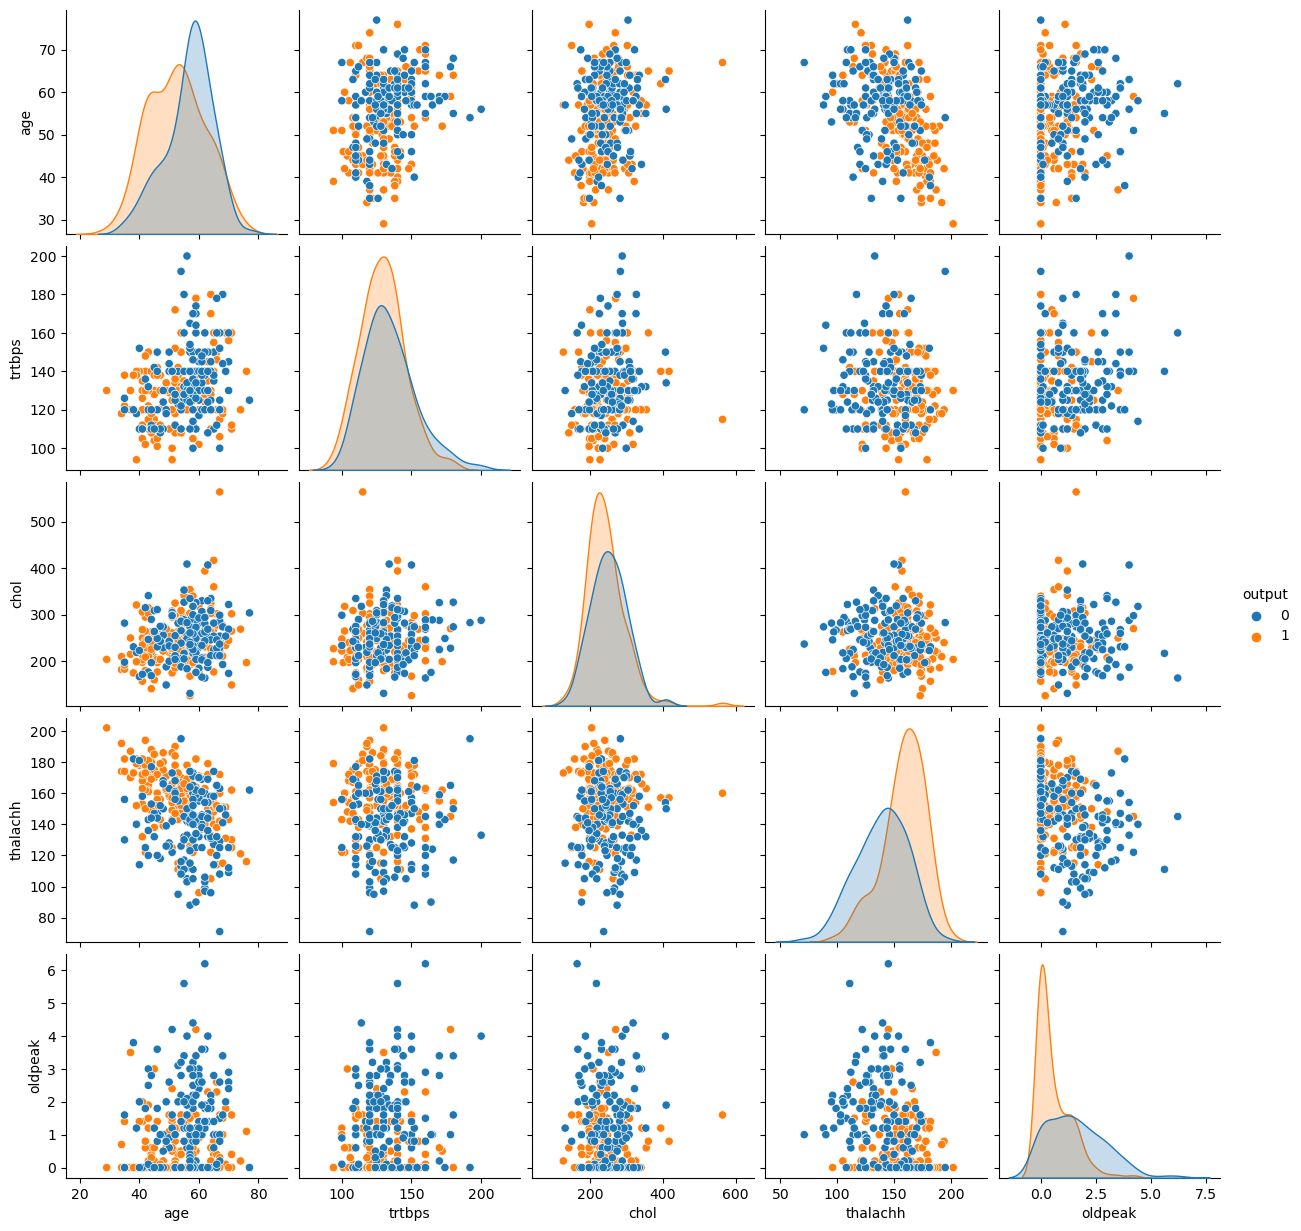

In [11]:
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

# Standardization

In [12]:
scaler=StandardScaler()
scaler

StandardScaler()

In [13]:
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

Standartlaştırma: Çoğunlukla regresyon, lojistik regresyon ve SVM gibi algoritmalarda kullanılır.
    
Standartlaştırma, verilerin ortalamasını 0 ve standart sapmasını 1 yapmayı amaçlar. Bu teknik, özellikle makine öğrenimi algoritmalarında verilerin farklı ölçeklerde olmasının olumsuz etkilerini azaltmak için kullanılır.
    
Normalizasyon: K-en yakın komşu (KNN) ve K-means gibi mesafe tabanlı algoritmalarda kullanılır.

Normalizasyon ise verileri belirli bir aralıkta (genellikle [0, 1] veya [-1, 1] arasında) ölçeklendirmeyi amaçlar. Bu teknik, özellikle mesafe tabanlı algoritmalarda (örneğin K-en yakın komşu, K-means) verilerin aynı ölçek üzerinde olmasını sağlamak için kullanılır.

# Box Plot Analysis

In [14]:
df_dummy=pd.DataFrame(scaled_array,columns=numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [15]:
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [16]:
data_melted = pd.melt(df_dummy, id_vars = "output", var_name = "features", value_name = "value")
data_melted

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
...,...,...,...
1510,0,oldpeak,-0.724323
1511,0,oldpeak,0.138373
1512,0,oldpeak,2.036303
1513,0,oldpeak,0.138373


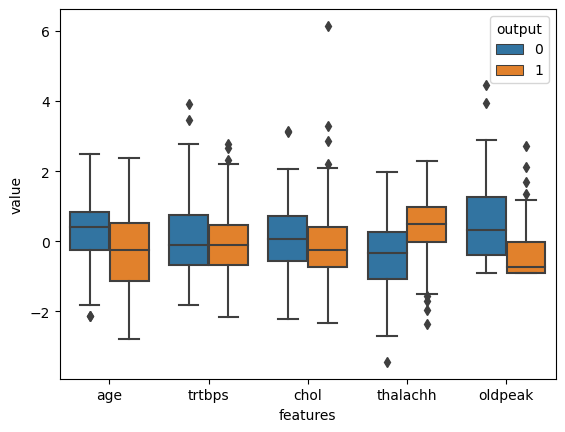

In [17]:
# box plot
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

# Swarm Plot Analysis

/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 45.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/muham

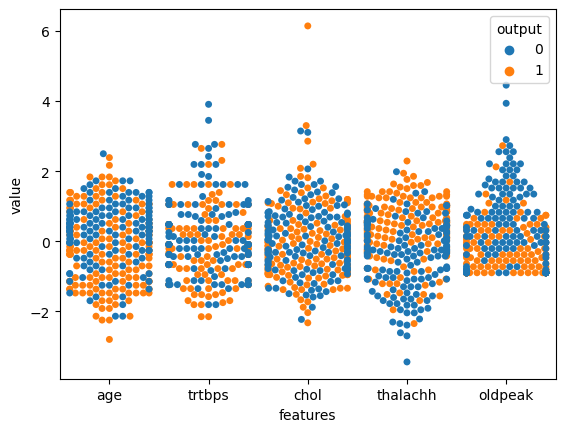

In [18]:
# swarm plot
plt.figure()
sns.swarmplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

# Cat Plot Analysis

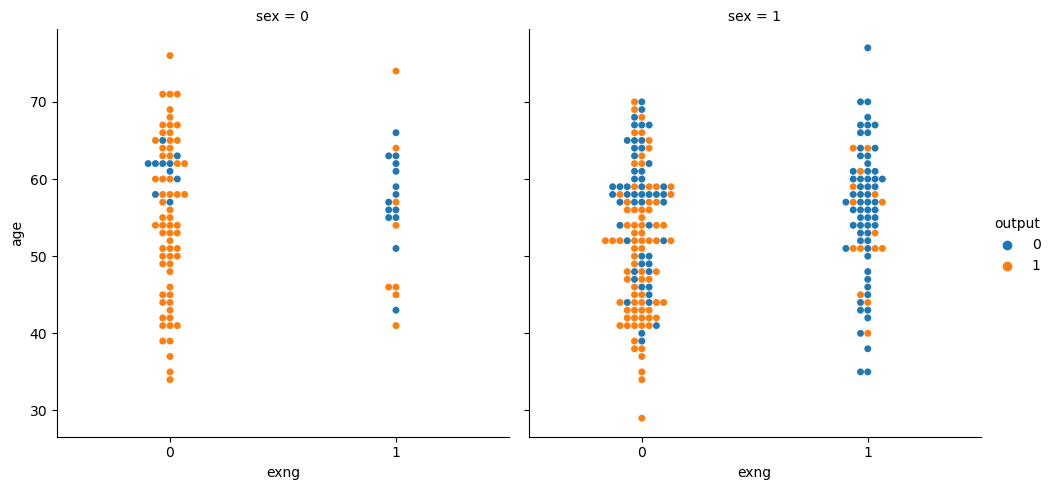

In [19]:
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = df)
plt.show()

# Correlation Analysis

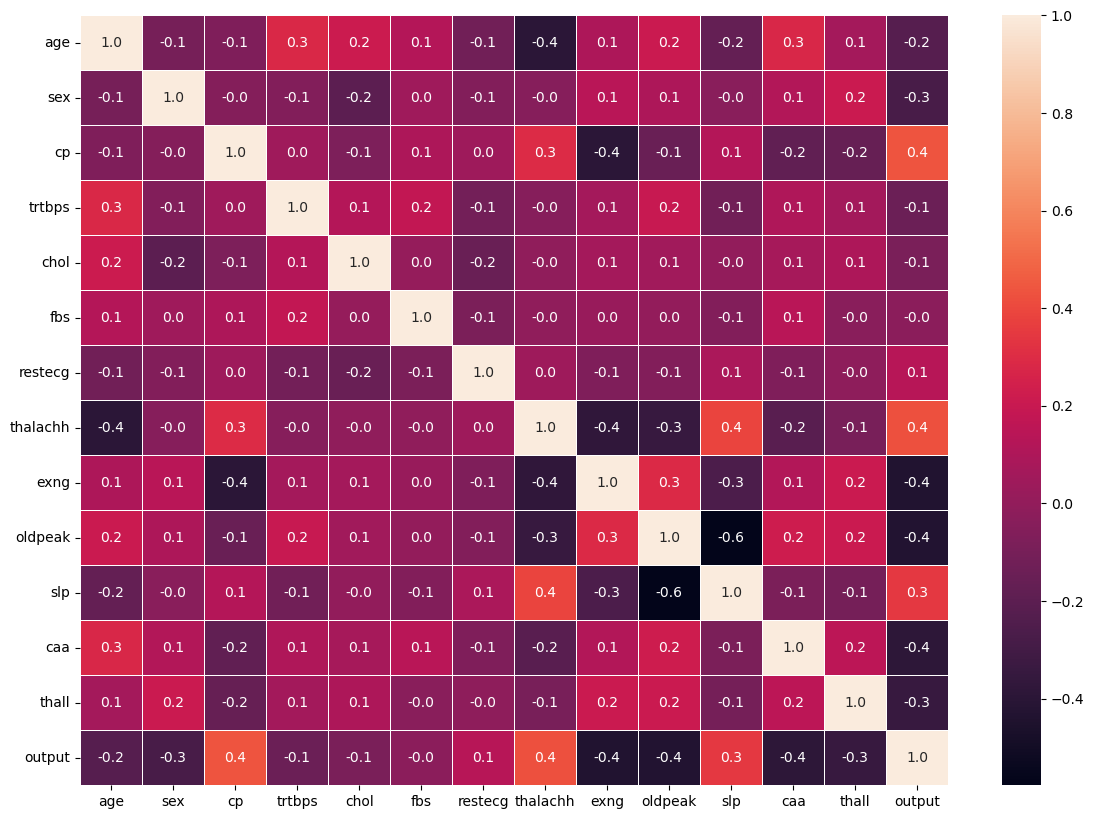

In [20]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

# Outlier Detection

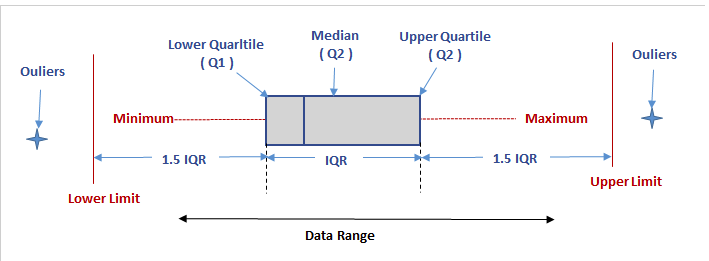

In [21]:
from IPython.display import display
from PIL import Image

# Fotoğrafı yükleme
img = Image.open("IQR.png")

# Fotoğrafı görüntüleme
display(img)

In [22]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [23]:
# outlier detection
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +1.5*IQR))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 1.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([  8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292]),) -- (array([], dtype=int64),)
New shape:  (290, 14)
Old shape:  (290,)
(array([ 27,  84,  95, 214, 237]),) -- (array([], dtype=int64),)
New shape:  (285, 14)
Old shape:  (285,)
(array([], dtype=int64),) -- (array([255]),)
New shape:  (284, 14)
Old shape:  (284,)
(array([195, 210, 211, 235, 273, 276]),) -- (array([], dtype=int64),)
KeyError: [195 210 211 235 273 276] not found in axis
New shape:  (284, 14)


# Modeling

In [24]:
df1=df.copy()

In [25]:
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


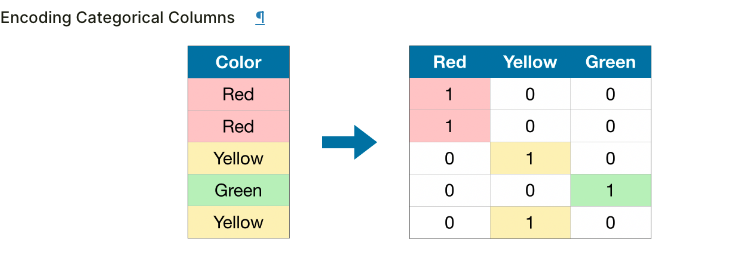

In [26]:
from IPython.display import display
from PIL import Image

# Fotoğrafı yükleme
img = Image.open("Encoding Categorial Columns.png")

# Fotoğrafı görüntüleme
display(img)

In [28]:
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first = True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [29]:
X = df1.drop(["output"], axis = 1)
y = df1[["output"]]

# Scaling

In [30]:
scaler = StandardScaler()
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.957206,1.049817,-0.231231,0.005804,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.871129,0.027128,0.095197,1.610888,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.436001,0.027128,-0.788078,0.960179,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.195731,-0.654665,-0.173626,1.220462,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.304513,-0.654665,2.092165,0.569753,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


# Train Test Split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=3)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (255, 22)
X_test shape: (29, 22)
y_train shape: (255, 1)
y_test shape: (29, 1)


In [66]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [67]:
y_pred_prob=logreg.predict_proba(X_test)
y_pred_prob

array([[0.00985404, 0.99014596],
       [0.66175665, 0.33824335],
       [0.05087691, 0.94912309],
       [0.33084319, 0.66915681],
       [0.25791021, 0.74208979],
       [0.03055096, 0.96944904],
       [0.40735449, 0.59264551],
       [0.08575845, 0.91424155],
       [0.29813785, 0.70186215],
       [0.77765483, 0.22234517],
       [0.79751161, 0.20248839],
       [0.99492496, 0.00507504],
       [0.2781782 , 0.7218218 ],
       [0.1449558 , 0.8550442 ],
       [0.09198978, 0.90801022],
       [0.09965718, 0.90034282],
       [0.23675583, 0.76324417],
       [0.99339789, 0.00660211],
       [0.95137081, 0.04862919],
       [0.31008972, 0.68991028],
       [0.01624362, 0.98375638],
       [0.9612055 , 0.0387945 ],
       [0.21454191, 0.78545809],
       [0.66214404, 0.33785596],
       [0.99242923, 0.00757077],
       [0.02286564, 0.97713436],
       [0.13224165, 0.86775835],
       [0.04906732, 0.95093268],
       [0.89491737, 0.10508263]])

In [68]:
y_pred=np.argmax(y_pred_prob,axis=1)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0])

In [69]:
dummy_ = pd.DataFrame(y_pred_prob)
dummy_["y_pred"] = y_pred
dummy_.head()

,0,1,y_pred
0,0.009854,0.990146,1
1,0.661757,0.338243,0
2,0.050877,0.949123,1
3,0.330843,0.669157,1
4,0.257910,0.742090,1


In [70]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.896551724137931


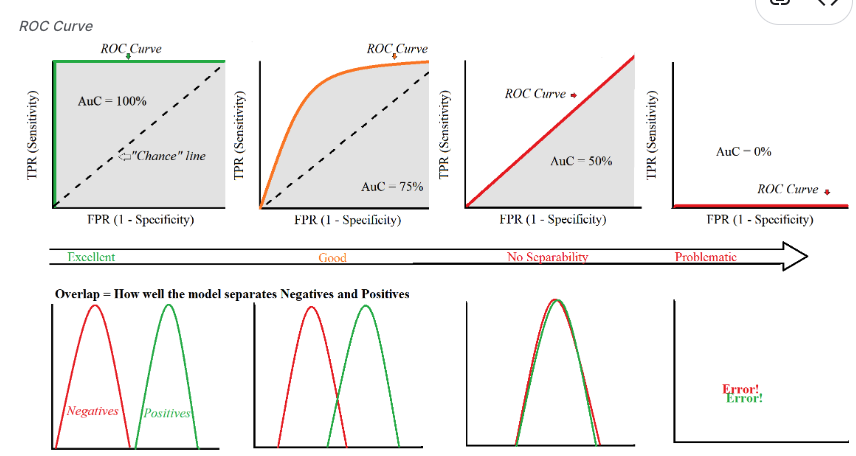

In [71]:
from IPython.display import display
from PIL import Image

# Fotoğrafı yükleme
img = Image.open("ROC Curve.png")

# Fotoğrafı görüntüleme
display(img)

In [72]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

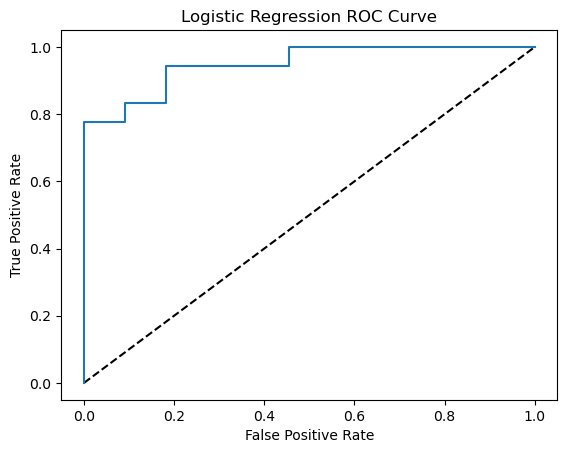

In [73]:
# plot curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

# Logistic Regression Hyperparameter Tuning

In [74]:
lr = LogisticRegression()
lr

LogisticRegression()

In [75]:
penalty = ["l1", "l2"]

parameters = {"penalty":penalty}

In [76]:
lr_searcher = GridSearchCV(lr, parameters)

In [77]:
lr_searcher.fit(X_train, y_train)

/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-v

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [78]:
print("Best parameters: ",lr_searcher.best_params_)

Best parameters:  {'penalty': 'l2'}


In [79]:
y_pred = lr_searcher.predict(X_test)

In [80]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.896551724137931
